# Project name: Stress level in students

Develop an artifact to predict stress levels on higher education students using Machine Learning.

This project aims to be used to help and improve educational institutions. With the results and 
findings of this research, colleges and universities can be favored and guided into developing changes 
in the design of the academic curriculum, planning of assignment submissions deadlines, final exam dates 
organization, and many other factors that can affect mental health in students.

### Features description


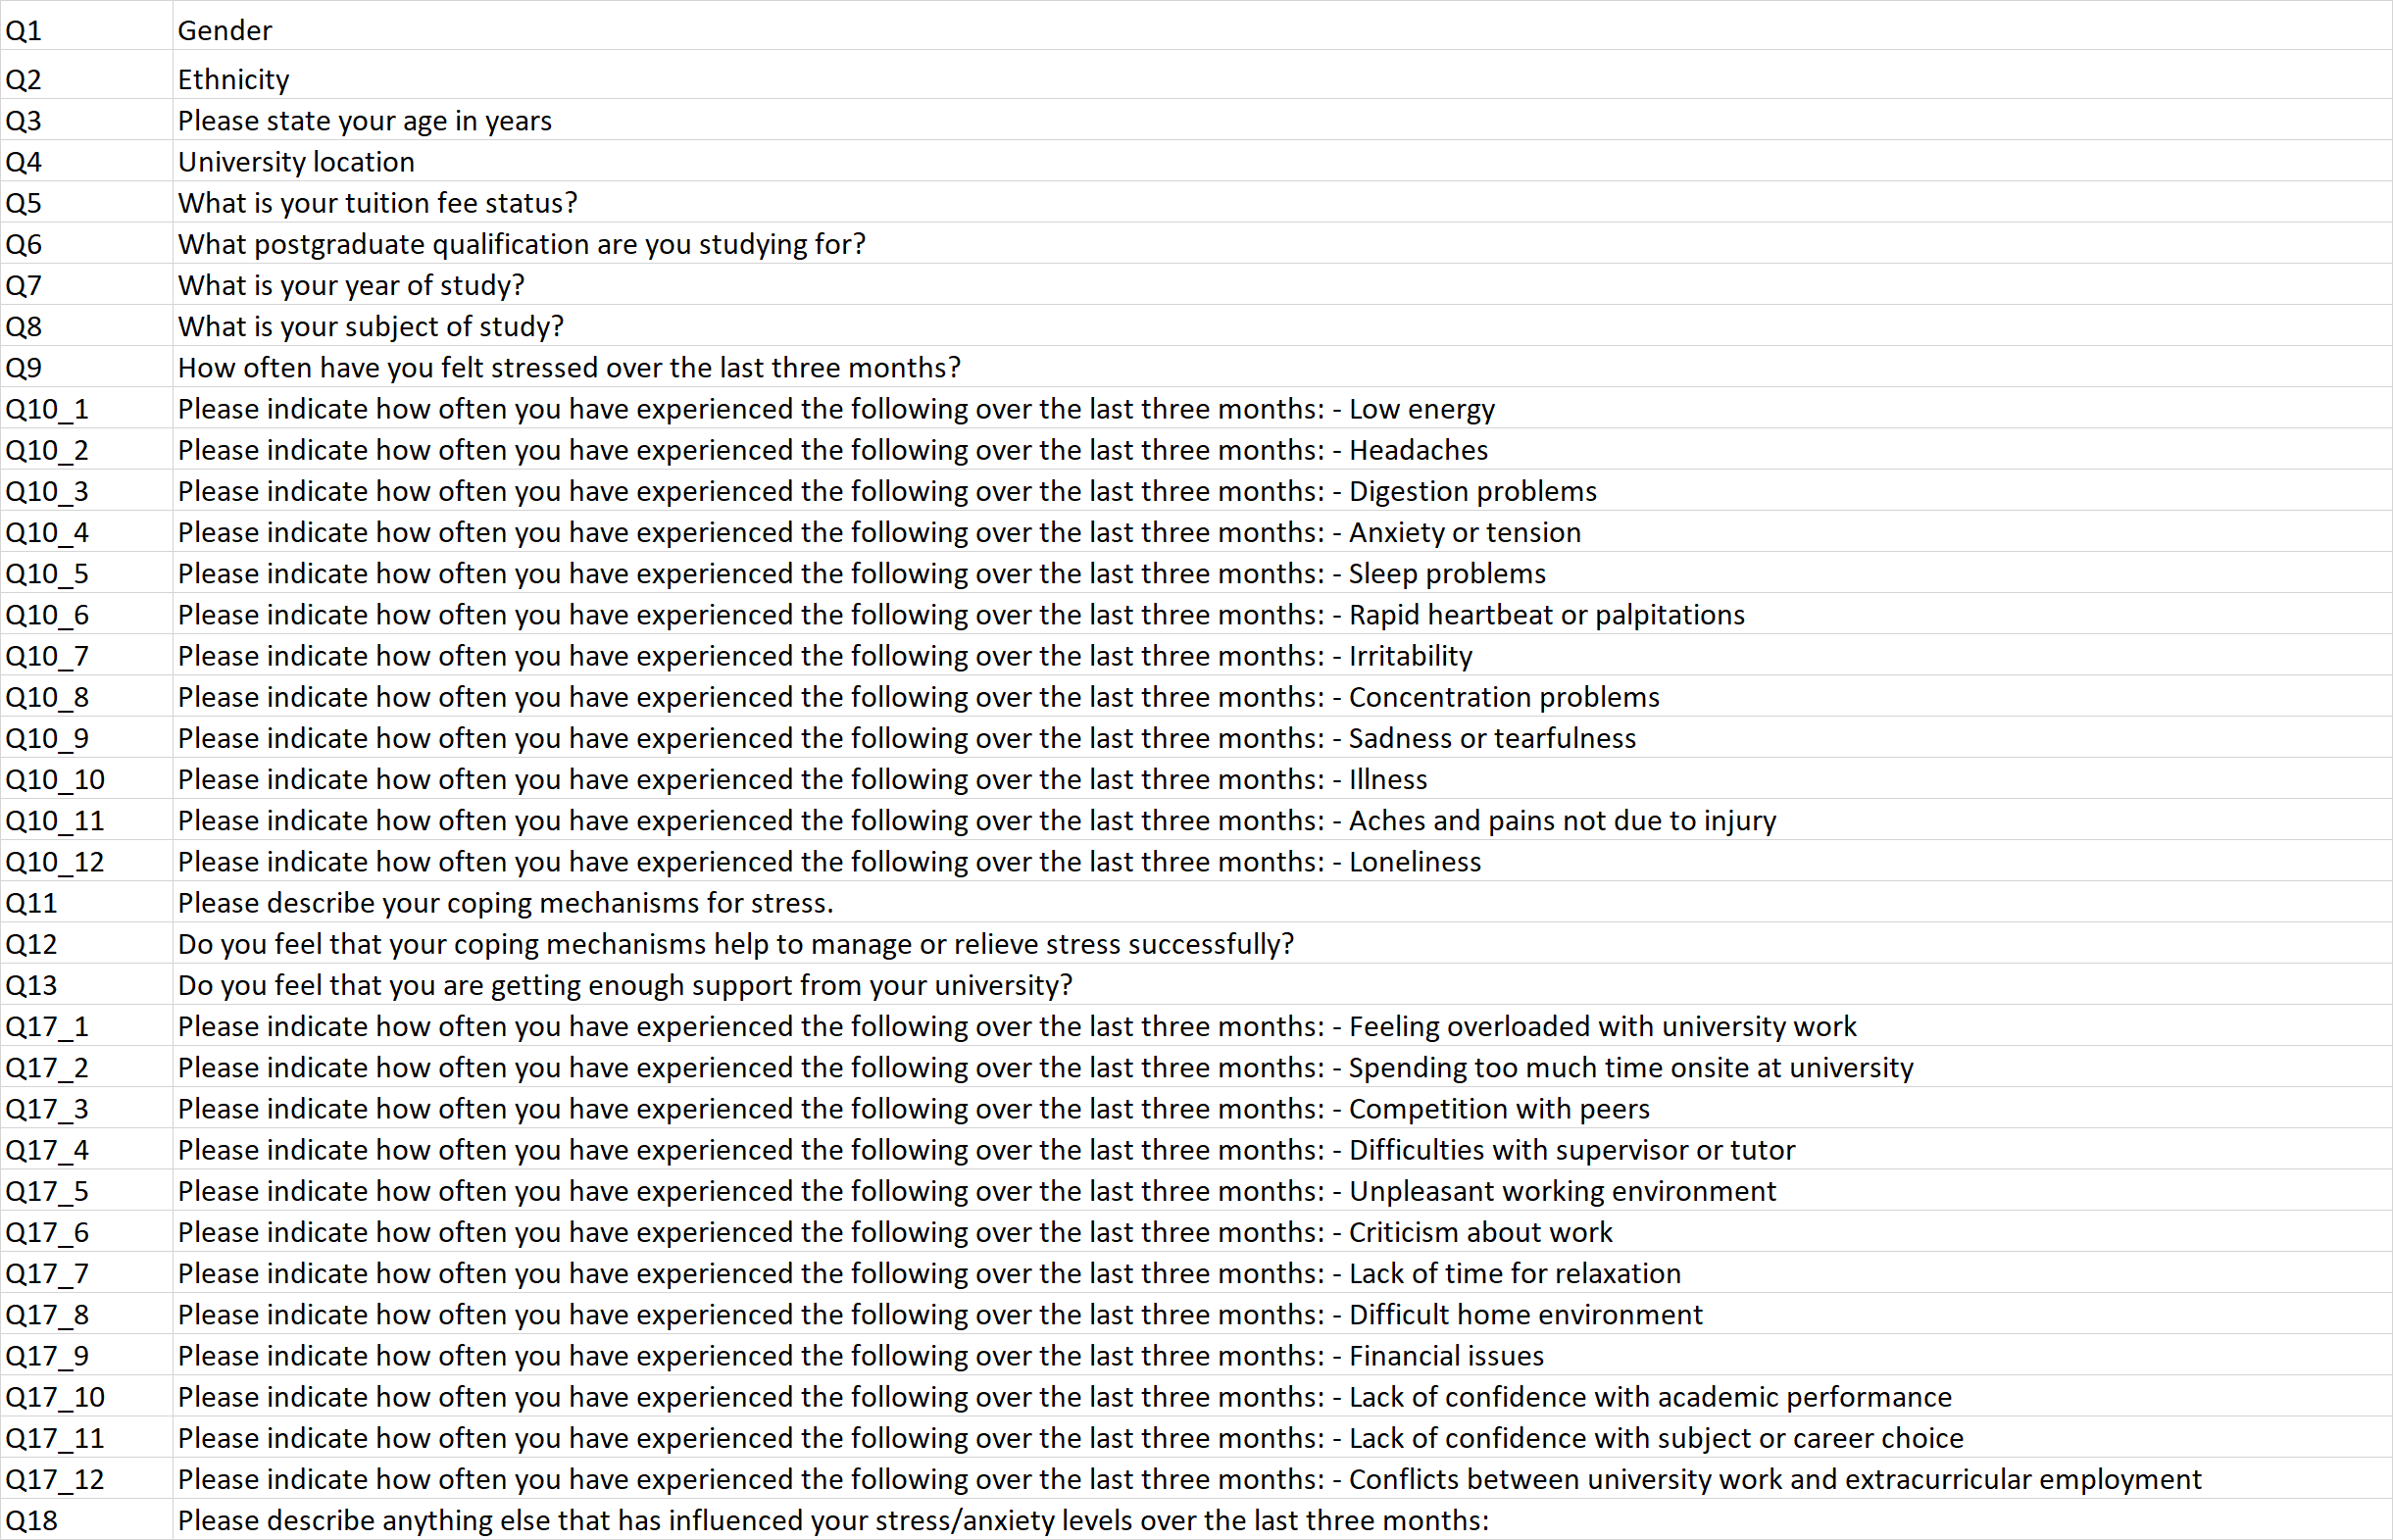

In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [107]:
from sklearn.preprocessing import MinMaxScaler

Load dataset from URL

In [519]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Dani-elaqh/PiRates.Stress/main/dataset.csv')

## EDA (Exploratory Data Analysis)

Start explore the data

First step check how many observations and features has the data

In [520]:
print(dataset.shape)

(218, 36)


Let's take a look at 10 samples observations

In [521]:
dataset.sample(10)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
98,Female,White,26,EU,PhD,1,Life sciences,To a large extent,Sometimes,Fairly often,...,Almost never,Sometimes,Almost never,Fairly often,Sometimes,Sometimes,Very often,Very often,Almost never,Examinations
0,Female,White,27,International,PhD,1,Arts and humanities,To a large extent,Sometimes,Almost never,...,Never,Never,Never,Sometimes,Never,Never,Very often,Almost never,Never,Being away from home as an international student
24,Female,White,29,UK,PhD,1,Life sciences,To a large extent,Very often,Very often,...,Never,Almost never,Almost never,Fairly often,Never,Very often,Very often,Very often,Fairly often,Feeling like I haven't got enough data
84,Female,White,25,UK,PhD,2,Physical science,Somewhat,Fairly often,Fairly often,...,Sometimes,Almost never,Almost never,Sometimes,Never,Sometimes,Fairly often,Fairly often,Almost never,NaN
149,Female,White,25,UK,PhD,1,Life sciences,To a large extent,Fairly often,Never,...,Never,Sometimes,Sometimes,Sometimes,Fairly often,Almost never,Very often,Fairly often,Sometimes,N/a
190,Male,White,50,International,PhD,1,Arts and humanities,Somewhat,Sometimes,Almost never,...,Almost never,Almost never,Almost never,Almost never,Sometimes,Sometimes,Fairly often,Almost never,Almost never,NaN
118,Female,Mixed / Multiple Ethnic Groups,31,International,PhD,3,Education,To a large extent,Fairly often,Fairly often,...,Sometimes,Almost never,Sometimes,Sometimes,Almost never,Almost never,Sometimes,Sometimes,Almost never,'-how to manage my free time withouth feeling ...
169,Male,White,25,UK,PhD,1,Life sciences,Somewhat,Almost never,Never,...,Almost never,Never,Never,Almost never,Never,Sometimes,Almost never,Never,Never,Relationship problems
108,Female,White,36,UK,Taught master's degree,1,Law,Completely,Very often,Fairly often,...,Sometimes,Fairly often,Fairly often,Very often,Sometimes,Very often,Fairly often,Very often,Very often,work
72,Female,White,39,EU,PhD,3,Life sciences,Somewhat,Fairly often,Sometimes,...,Never,Sometimes,Almost never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Almost never,being far away from my home country/family and...


### Type of data (Numerical or Categorical?)

Identify which features are numerical and which are categorical

In [522]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

**Note** that only one feature (Q3 = Age) has numerical values

### Missing Values

In [523]:
# NaN occurrences in Columns

print(dataset.isnull().sum(axis = 0))

Q1         0
Q2         0
Q3         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10_1      0
Q10_2      0
Q10_3      0
Q10_4      0
Q10_5      0
Q10_6      0
Q10_7      0
Q10_8      0
Q10_9      0
Q10_10     0
Q10_11     0
Q10_12     0
Q11        0
Q12        0
Q13        0
Q17_1      0
Q17_2      0
Q17_3      0
Q17_4      0
Q17_5      0
Q17_6      0
Q17_7      0
Q17_8      0
Q17_9      0
Q17_10     0
Q17_11     0
Q17_12     0
Q18       74
dtype: int64


There are missing data only in one feature (Q18)

In [524]:
dataset_1 = dataset

In [525]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
16,Female,White,24,UK,PhD,3,Engineering and technology,Somewhat,Fairly often,Almost never,...,Fairly often,Almost never,Fairly often,Fairly often,Never,Never,Sometimes,Almost never,Never,NaN
41,Female,White,26,UK,Research master's degree,1,"Clinical, pre-clinical and health",Somewhat,Sometimes,Sometimes,...,Almost never,Almost never,Sometimes,Fairly often,Never,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes stressful part-time job.
83,Female,White,25,UK,PhD,1,Social sciences,To a large extent,Sometimes,Sometimes,...,Sometimes,Almost never,Almost never,Sometimes,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,"End of job contract, moving home"
45,Female,Other,36,International,PhD,1,Social sciences,Completely,Fairly often,Sometimes,...,Almost never,Sometimes,Sometimes,Fairly often,Fairly often,Almost never,Fairly often,Never,Never,English as a second language
93,Female,Black / African / Caribbean / Black British,27,UK,PhD,3,Psychology,To a large extent,Fairly often,Almost never,...,Sometimes,Sometimes,Very often,Sometimes,Never,Sometimes,Fairly often,Fairly often,Almost never,Time management and general lack of positive f...


In [526]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

### Statistics of the features

In [527]:
dataset_1.describe()

,Q3
count,218.000000
mean,36.550459
std,132.862771
min,21.000000
25%,24.000000
50%,26.000000
75%,29.000000
max,1987.000000


Only shows the statistical data of the attribute Q3 that is the only numeric one so far.

### Outliers

show all outliers in the dataset

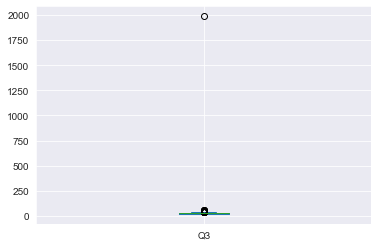

In [528]:
dataset_1.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

Text(0.5, 1.0, 'Year of study (Q7) vs age (Q3) by gender')

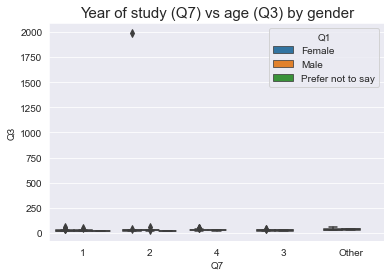

In [529]:
#BOX PLOT

sns.boxplot(x='Q7', y='Q3', data=dataset, hue='Q1')
plt.title('Year of study (Q7) vs age (Q3) by gender', fontsize=15)

The data presents outliers in the Q3 feature corresponding to age.

### Fixing outliers

In [530]:
dataset_1['Q3'].value_counts()

26      32
24      29
25      27
22      24
29      20
23      15
27      12
28      11
31       7
30       7
36       4
32       3
33       3
21       3
39       3
35       3
34       3
48       2
43       2
58       1
53       1
63       1
1987     1
50       1
38       1
40       1
56       1
Name: Q3, dtype: int64

It was identified that the outlier is in relation to the fact that they put the year of birth and not the age, this data has to be replaced by the correct age

In [531]:
dataset_1['Q3'] = dataset_1['Q3'].replace(1987, 33)

In [532]:
##dataset_1['Q3'] = dataset_1['Q3'].replace(1987, dataset_1['Q3'].mode()[0])

Text(0.5, 1.0, 'Year of study (Q7) vs age (Q3) by gender')

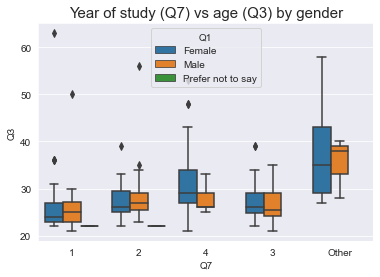

In [533]:
#BOX PLOT

sns.boxplot(x='Q7', y='Q3', data=dataset, hue='Q1')
plt.title('Year of study (Q7) vs age (Q3) by gender', fontsize=15)

### Converting the categorical feature into numerical

In [534]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

**35 out of 36 features are objects, all columns must be evaluated and replaced by numerical data.**

In [535]:
dataset_1['Q1'].value_counts()

Female               161
Male                  55
Prefer not to say      2
Name: Q1, dtype: int64

In [536]:
dataset_1['Q1'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [537]:
##dataset_1['Q1'].map({'Female':1, 'Male':2, 'Prefer not to say':3})

In [538]:
dataset_1['Q1'].replace(('Female', 'Male', 'Prefer not to say'),(1, 2, 3), inplace = True)

In [539]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
142,1,White,26,UK,PhD,2,Psychology,Somewhat,Fairly often,Never,...,Almost never,Fairly often,Almost never,Sometimes,Never,Almost never,Fairly often,Almost never,Never,Body image
95,1,White,21,UK,Other,4,Life sciences,To a large extent,Very often,Sometimes,...,Sometimes,Sometimes,Sometimes,Fairly often,Sometimes,Sometimes,Very often,Fairly often,Fairly often,Health
97,1,White,29,UK,PhD,4,Arts and humanities,Somewhat,Fairly often,Sometimes,...,Never,Sometimes,Fairly often,Sometimes,Sometimes,Sometimes,Very often,Sometimes,Very often,Long weekly commute
102,1,White,23,UK,PhD,1,Life sciences,To a large extent,Very often,Sometimes,...,Never,Almost never,Almost never,Sometimes,Fairly often,Sometimes,Fairly often,Never,Almost never,Issues at work
213,2,Mixed / Multiple Ethnic Groups,23,UK,Research master's degree,1,Life sciences,Completely,Fairly often,Almost never,...,Almost never,Sometimes,Almost never,Fairly often,Very often,Very often,Fairly often,Fairly often,Fairly often,Father has a terminal illness that is deterior...


In [540]:
dataset_1['Q2'].value_counts()

White                                          174
Mixed / Multiple Ethnic Groups                  15
Asian / Asian British                           14
Other                                           11
Black / African / Caribbean / Black British      4
Name: Q2, dtype: int64

In [541]:
dataset_1['Q2'].unique()

array(['White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British',
       'Other', 'Black / African / Caribbean / Black British'],
      dtype=object)

In [542]:
dataset_1['Q2'].replace(('White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British','Other', 
                         'Black / African / Caribbean / Black British'),(1, 2, 3, 4, 5), inplace = True)

In [543]:
dataset_1['Q3'].value_counts()

26    32
24    29
25    27
22    24
29    20
23    15
27    12
28    11
31     7
30     7
36     4
33     4
32     3
21     3
39     3
35     3
34     3
48     2
43     2
58     1
53     1
63     1
50     1
38     1
40     1
56     1
Name: Q3, dtype: int64

### Group ages into ranges

The feature Q3 (Age) will have to be classified by ranges so as not to have many values that can cause noise in the data analysis.

In [544]:
bins = [0, 20, 25, 30, 35, 40, 65]

In [545]:
names = [1, 2, 3, 4, 5, 6]

In [546]:
dataset_1['Q3'] = pd.cut(dataset_1['Q3'], bins, labels = names)

In [547]:
dataset_1['Q3'].replace(('1', '2', '3', '4', '5', '6'),(1, 2, 3, 4, 5, 6), inplace = True)

**Convert Q3 (Age) Categorical data to Integer**

In [548]:
dataset_1.iloc[:, 2 ] = dataset_1.iloc[:, 2 ].astype(float).astype(int)

In [549]:
dataset_1['Q3'].value_counts()

2    98
3    82
4    20
6     9
5     9
Name: Q3, dtype: int64

In [550]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    int64 
 1   Q2      218 non-null    int64 
 2   Q3      218 non-null    int32 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

In [551]:
dataset_1['Q5'].replace(('EU', 'International', 'UK'),(1, 2, 1), inplace = True)

In [552]:
dataset_1['Q5'].value_counts()

1    185
2     33
Name: Q5, dtype: int64

In [553]:
dataset_1['Q6'].replace(("Other", "PhD", "Research master's degree","Taught master's degree"),(0, 1, 2, 3), inplace = True)

In [554]:
dataset_1['Q6'].value_counts()

1    160
3     41
2     12
0      5
Name: Q6, dtype: int64

In [555]:
dataset_1['Q7'].replace(('1','2', '3','4','Other'),(1, 2, 3, 4, 1), inplace = True)

In [556]:
dataset_1['Q7'].value_counts()

1    108
2     44
3     38
4     28
Name: Q7, dtype: int64

In [557]:
dataset_1['Q8'].unique()

array(['Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'], dtype=object)

In [558]:
dataset_1['Q8'].replace(('Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'),(1, 3, 6, 8, 7, 3, 2, 4, 10, 5, 9), inplace = True)

In [559]:
dataset_1['Q8'].value_counts()

6     80
1     42
9     17
7     15
10    15
3     13
2     13
8     11
5      7
4      5
Name: Q8, dtype: int64

In [560]:
dataset_1['Q9'].unique()

array(['To a large extent', 'Somewhat', 'Completely', 'To a small extent'],
      dtype=object)

In [561]:
dataset_1['Q9'].replace(('To a large extent', 'Somewhat', 'Completely', 'To a small extent', 'not at all'),
                        (4, 3, 5, 2, 1), inplace = True)

In [562]:
dataset_1['Q9'].value_counts()

4    120
3     55
5     36
2      7
Name: Q9, dtype: int64

In [563]:
dataset_1.sample(3)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
215,2,1,3,2,1,1,6,3,Sometimes,Sometimes,...,Never,Never,Almost never,Very often,Sometimes,Fairly often,Fairly often,Very often,Never,NaN
72,1,1,5,1,1,3,6,3,Fairly often,Sometimes,...,Never,Sometimes,Almost never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Almost never,being far away from my home country/family and...
48,1,1,2,1,1,3,6,4,Fairly often,Fairly often,...,Never,Never,Almost never,Fairly often,Almost never,Never,Sometimes,Fairly often,Never,Family (grandparents) and a personal injury


In [564]:
dataset_1['Q10_1'].unique()

array(['Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'],
      dtype=object)

In [565]:
dataset_1['Q10_1'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [566]:
dataset_1['Q10_2'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [567]:
dataset_1['Q10_3'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [568]:
dataset_1['Q10_4'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                          inplace = True)

In [569]:
dataset_1['Q10_5'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [570]:
dataset_1['Q10_6'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [571]:
dataset_1['Q10_7'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [572]:
dataset_1['Q10_8'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [573]:
dataset_1['Q10_9'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [574]:
dataset_1['Q10_10'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [575]:
dataset_1['Q10_11'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [576]:
dataset_1['Q10_12'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [577]:
dataset_1['Q10_12'].value_counts()

3    72
2    53
4    38
1    36
5    19
Name: Q10_12, dtype: int64

In [578]:
dataset_1['Q12'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [579]:
dataset_1['Q12'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [580]:
dataset_1['Q12'].value_counts()

1    91
3    91
2    36
Name: Q12, dtype: int64

In [581]:
dataset_1['Q13'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [582]:
dataset_1['Q13'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [583]:
dataset_1['Q17_1'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_2'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_3'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_4'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_5'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_6'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_7'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_8'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_9'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_10'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_11'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_12'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)

**Drop column Q11, Q18** because the information is irrelevant for the data analysis

In [584]:
dataset_1.drop(columns =['Q11'], inplace = True)

In [585]:
dataset_1.drop(columns =['Q18'], inplace = True)

### Verify all changes made to the dataset

**All features are numerical data**

In [586]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      218 non-null    int64
 1   Q2      218 non-null    int64
 2   Q3      218 non-null    int32
 3   Q5      218 non-null    int64
 4   Q6      218 non-null    int64
 5   Q7      218 non-null    int64
 6   Q8      218 non-null    int64
 7   Q9      218 non-null    int64
 8   Q10_1   218 non-null    int64
 9   Q10_2   218 non-null    int64
 10  Q10_3   218 non-null    int64
 11  Q10_4   218 non-null    int64
 12  Q10_5   218 non-null    int64
 13  Q10_6   218 non-null    int64
 14  Q10_7   218 non-null    int64
 15  Q10_8   218 non-null    int64
 16  Q10_9   218 non-null    int64
 17  Q10_10  218 non-null    int64
 18  Q10_11  218 non-null    int64
 19  Q10_12  218 non-null    int64
 20  Q12     218 non-null    int64
 21  Q13     218 non-null    int64
 22  Q17_1   218 non-null    int64
 23  Q17_2   218 non

In [587]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
122,1,1,2,1,1,1,2,4,4,2,...,2,2,2,2,3,3,5,2,3,1
51,1,1,4,1,1,3,1,3,3,3,...,3,2,2,4,4,2,5,4,4,4
148,1,1,2,1,0,1,9,3,3,1,...,4,2,1,3,4,1,4,5,3,5
117,1,1,2,1,1,1,6,5,5,4,...,5,1,4,3,5,1,5,5,4,4
200,2,1,2,1,1,4,6,4,3,3,...,3,2,4,3,5,3,5,2,1,1


**Statistics of the feature**

In [588]:
dataset_1.describe()

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,1.270642,1.422018,2.848624,1.151376,1.408257,1.935780,5.220183,3.848624,3.844037,2.995413,...,2.784404,2.344037,2.366972,2.399083,3.527523,2.288991,2.940367,3.880734,3.321101,2.366972
std,0.465551,0.948378,1.029529,0.359240,0.816492,1.088484,2.816534,0.724822,0.781990,1.013720,...,1.200743,1.146417,1.074725,1.021158,1.034731,1.204434,1.284837,1.035986,1.239747,1.424994
min,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.250000,3.000000,3.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000
50%,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,6.000000,4.000000,4.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
75%,2.000000,1.000000,3.000000,1.000000,1.000000,3.000000,7.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,5.000000,4.000000,3.750000
max,3.000000,5.000000,6.000000,2.000000,3.000000,4.000000,10.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**No missing values**

In [589]:
#'NaN occurrences in Columns

print(dataset_1.isnull().sum(axis = 0))

Q1        0
Q2        0
Q3        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10_1     0
Q10_2     0
Q10_3     0
Q10_4     0
Q10_5     0
Q10_6     0
Q10_7     0
Q10_8     0
Q10_9     0
Q10_10    0
Q10_11    0
Q10_12    0
Q12       0
Q13       0
Q17_1     0
Q17_2     0
Q17_3     0
Q17_4     0
Q17_5     0
Q17_6     0
Q17_7     0
Q17_8     0
Q17_9     0
Q17_10    0
Q17_11    0
Q17_12    0
dtype: int64


### Visualizations

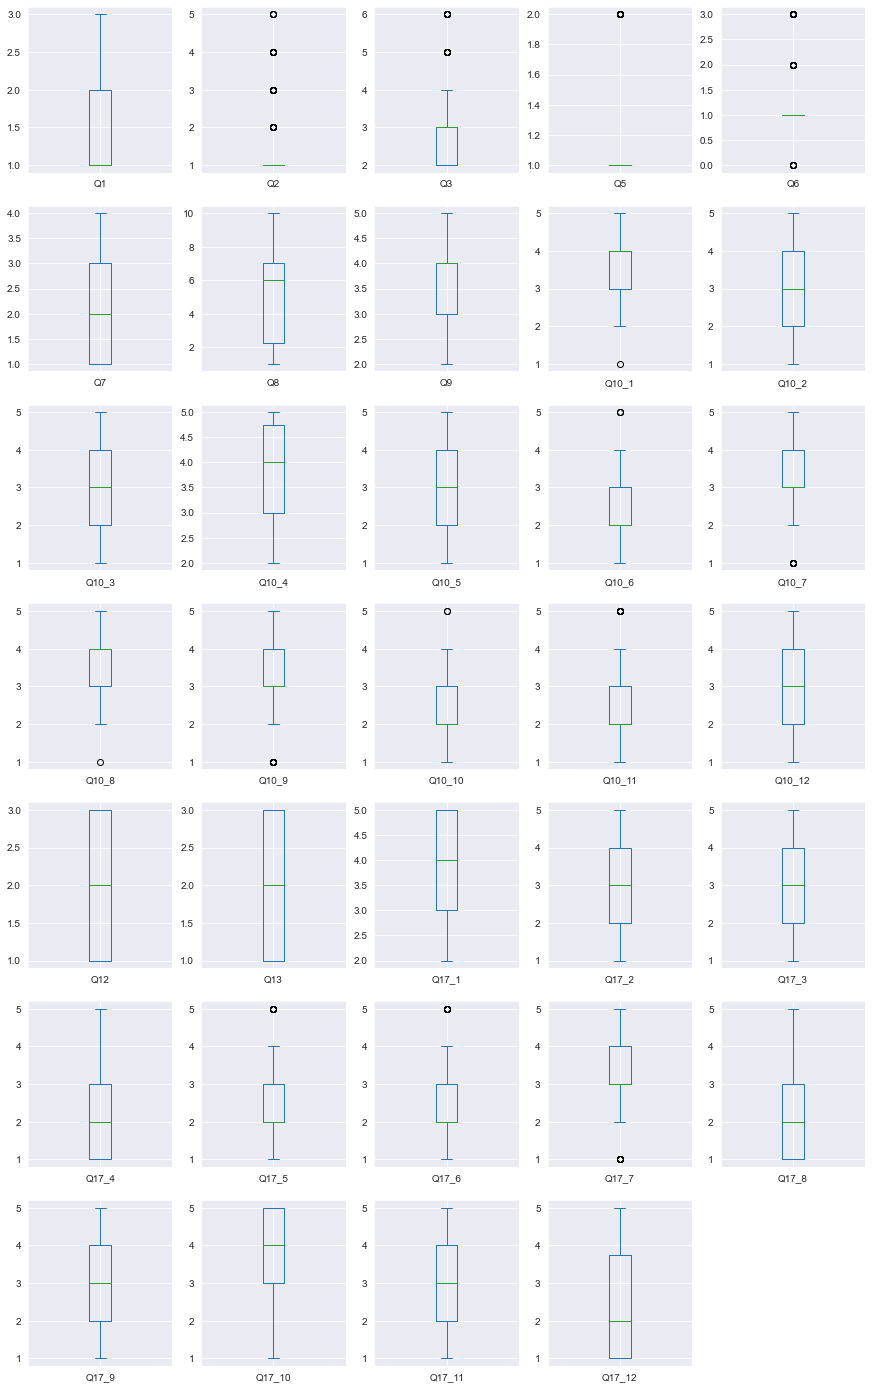

In [590]:
dataset_1.plot(kind='box', subplots=True, layout=(7,5), sharex=False, sharey=False, figsize=(15, 25))
plt.show()

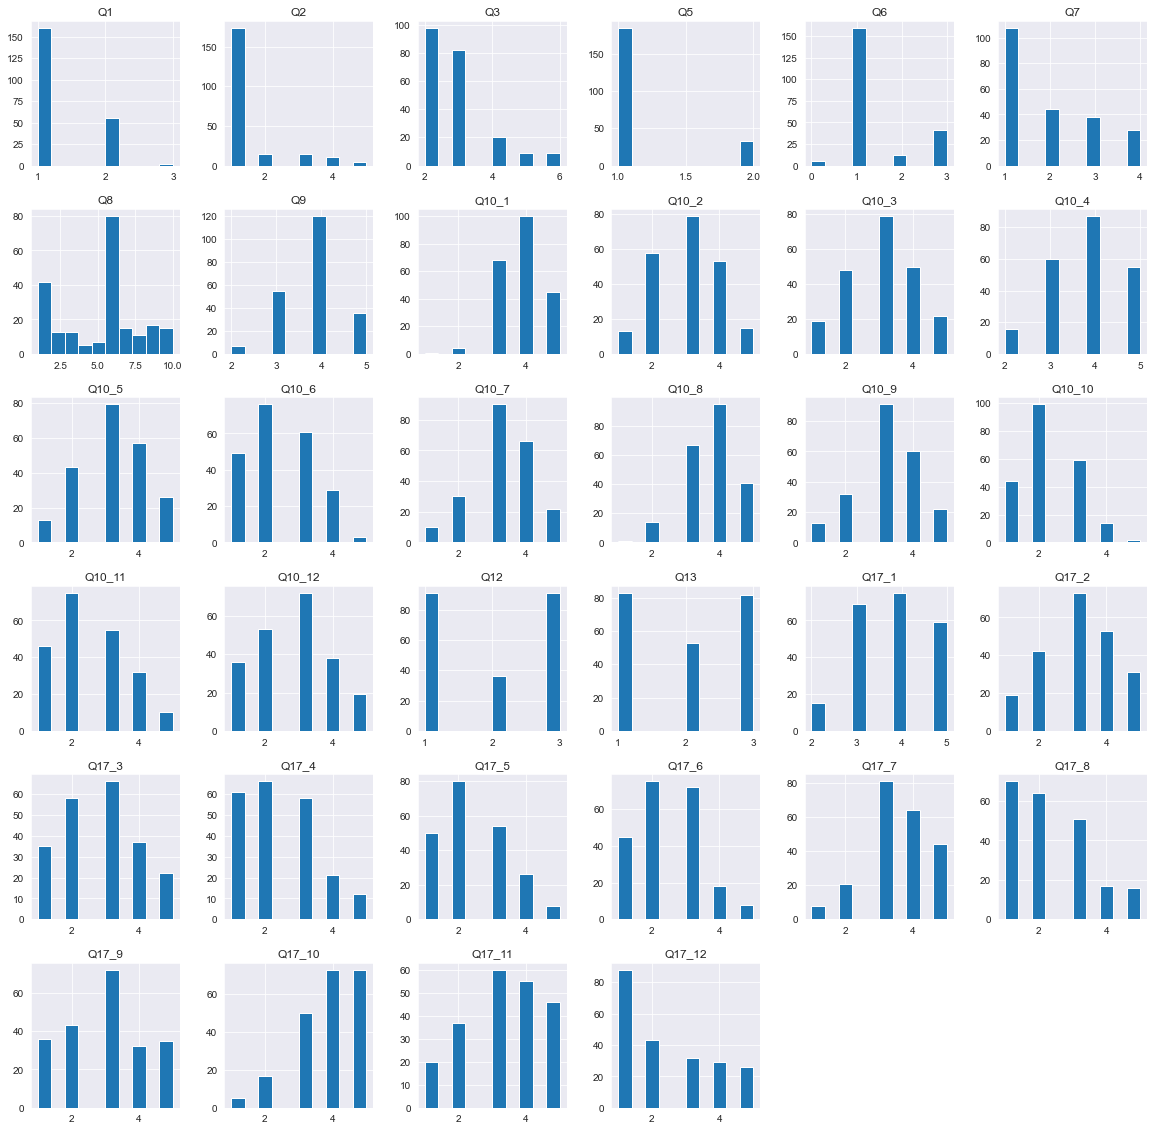

In [591]:
dataset_1.hist(figsize=(20, 20))
plt.show()

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Q7', ylabel='Q9'>

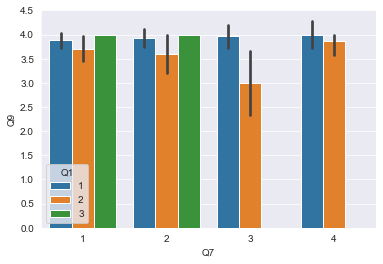

In [592]:
sns.barplot('Q7','Q9', hue = 'Q1', data=dataset_1)

Text(0.5, 1.0, 'Stress level (Q9) vs Year of study (Q7) ')

<Figure size 576x288 with 0 Axes>

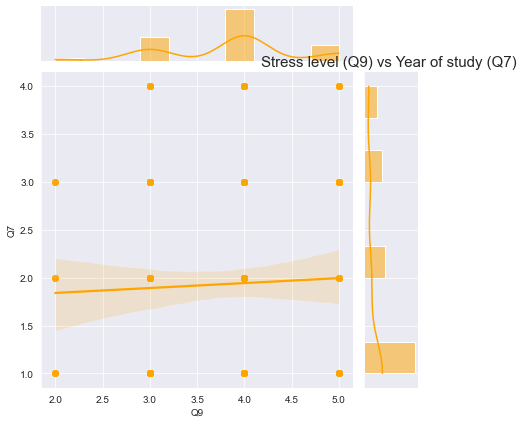

In [593]:
#Scatter plot

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Q9', y='Q7', data=dataset_1, kind='reg', color='orange')
plt.title("Stress level (Q9) vs Year of study (Q7) ", fontsize=15)

### Correlations

In [594]:
corr1= dataset_1.corr()
corr1

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
Q1,1.000000,-0.009384,-0.029506,-0.025658,-0.025303,-0.047388,-0.098372,-0.164819,-0.149343,-0.095003,...,-0.051769,-0.002574,-0.024420,-0.024678,-0.058583,-0.033288,-0.057640,-0.162080,-7.141970e-02,-0.060096
Q2,-0.009384,1.000000,0.226202,0.555565,-0.074745,0.071017,0.108246,0.086659,-0.022689,0.059543,...,-0.061370,0.145588,0.127674,0.177416,0.067942,0.037975,0.028312,0.070226,9.194541e-02,0.055372
Q3,-0.029506,0.226202,1.000000,0.348822,-0.216695,0.258582,-0.168036,-0.129657,-0.080976,-0.027162,...,-0.041433,-0.088423,0.017118,0.013894,-0.037167,-0.012871,-0.100919,-0.042929,-6.283617e-02,0.129133
Q5,-0.025658,0.555565,0.348822,1.000000,-0.133111,0.083901,0.007897,-0.000081,-0.128825,-0.023393,...,-0.116291,0.040806,-0.049058,0.048116,-0.017459,0.015585,-0.030273,-0.000795,-3.721192e-02,-0.027997
Q6,-0.025303,-0.074745,-0.216695,-0.133111,1.000000,-0.369625,0.092988,0.003679,-0.022513,0.013408,...,0.029087,0.080645,0.080557,-0.002865,-0.010634,0.104404,0.155098,-0.072923,7.476214e-02,0.235027
Q7,-0.047388,0.071017,0.258582,0.083901,-0.369625,1.000000,-0.138166,0.034349,0.047732,0.037319,...,-0.014168,-0.011757,0.012360,0.068770,0.132507,0.014222,-0.035702,0.025869,3.584139e-02,0.059829
Q8,-0.098372,0.108246,-0.168036,0.007897,0.092988,-0.138166,1.000000,0.054776,0.118186,-0.072275,...,-0.022690,0.113442,0.000587,-0.061136,-0.036876,-0.014768,-0.094410,-0.016228,-2.034113e-02,-0.230343
Q9,-0.164819,0.086659,-0.129657,-0.000081,0.003679,0.034349,0.054776,1.000000,0.470365,0.275009,...,0.295908,0.135059,0.207703,0.218970,0.395752,0.261489,0.079333,0.368613,2.389614e-01,0.174496
Q10_1,-0.149343,-0.022689,-0.080976,-0.128825,-0.022513,0.047732,0.118186,0.470365,1.000000,0.260691,...,0.356650,0.214340,0.271298,0.222578,0.318568,0.170395,0.105366,0.318234,2.705525e-01,0.171528
Q10_2,-0.095003,0.059543,-0.027162,-0.023393,0.013408,0.037319,-0.072275,0.275009,0.260691,1.000000,...,0.097618,0.116359,0.149597,0.197653,0.160478,0.099223,0.141314,0.139893,1.918519e-01,0.100065


<AxesSubplot:>

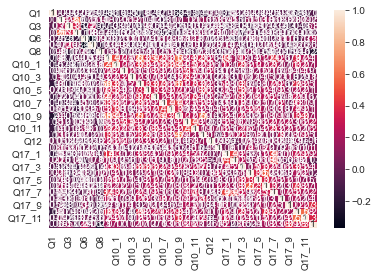

In [595]:
sns.heatmap(corr1, annot=True)

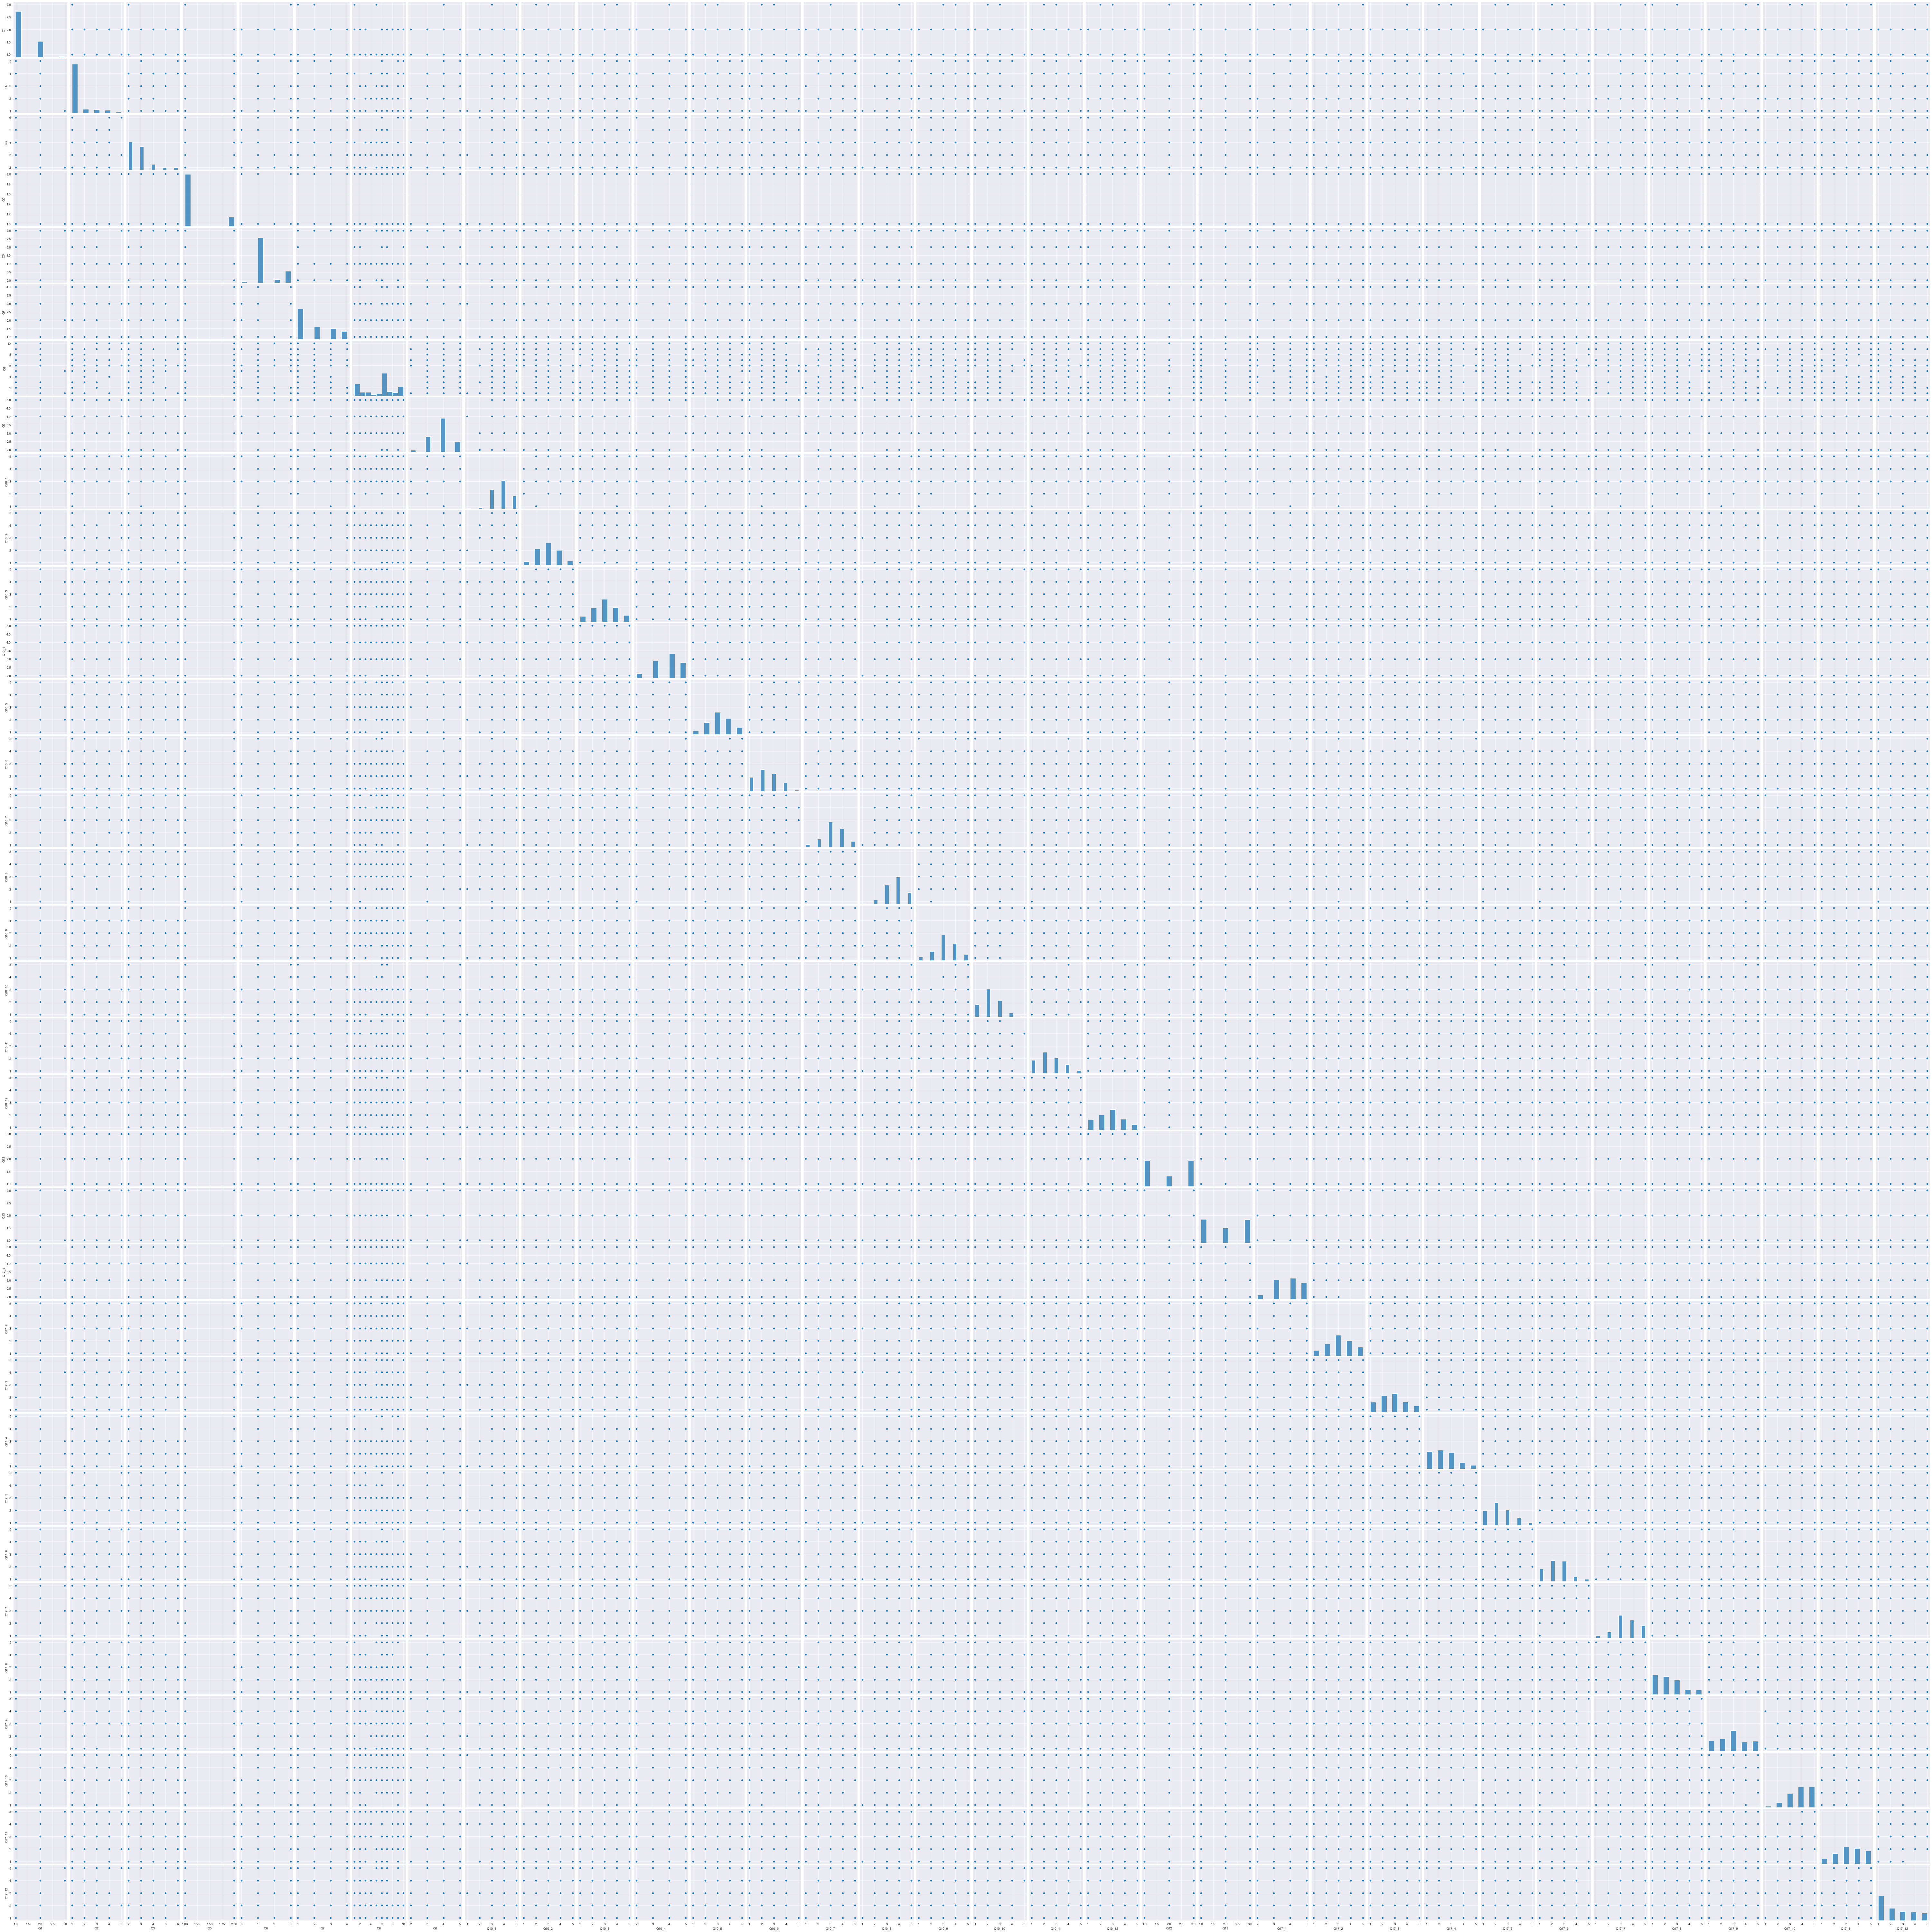

In [81]:
sns.pairplot(dataset_1)

In [596]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
96,1,1,2,1,3,1,9,4,4,2,...,3,4,1,1,3,2,5,4,2,5
10,1,3,5,2,1,3,7,4,3,4,...,2,2,3,3,3,2,4,4,3,3
149,1,1,2,1,1,1,6,4,4,1,...,5,1,3,3,3,4,2,5,4,3
129,1,1,2,1,1,2,3,4,5,2,...,3,1,1,1,4,2,3,4,2,1
81,1,1,2,1,1,2,6,4,4,4,...,3,5,4,5,4,2,5,4,4,3


## Reindex columns 

Reindex column Q9 (dependent feature) to the end that represents How is the stressed level over the last Semester.

In [597]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12'],
      dtype='object')

In [598]:
dataset_1 = dataset_1.reindex(columns=['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3',
       'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10',
       'Q17_11', 'Q17_12', 'Q9'])

In [599]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2', 'Q10_3',
       'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12', 'Q9'],
      dtype='object')

In [600]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
141,1,1,2,1,3,1,6,5,3,3,...,2,2,3,4,3,3,5,3,4,5
137,1,1,6,1,1,1,1,3,1,3,...,1,2,1,3,3,2,3,1,2,3
192,2,1,2,1,1,1,6,4,3,2,...,3,2,3,4,2,1,4,4,1,3
18,1,2,2,1,1,1,6,4,4,4,...,2,1,2,5,2,3,3,3,1,4
185,2,1,2,1,3,1,9,3,3,3,...,5,4,1,2,2,4,1,3,3,3


### Feature Scaling

**Standardization Dataset**

In [601]:
##scaling = StandardScaler()

In [602]:
##scaling.fit_transform(dataset_1)

**Normalize Dataset with MinMax**

In [603]:
#scalar = MinMaxScaler()
#scalar.fit(dataset_1)
#dataset_norm = scalar.transform(dataset_1)

In [616]:
dataset_norm = dataset_1.apply(lambda x: (x - x.min(axis = 0))/ (x.max(axis=0)- x.min(axis=0)))

In [617]:
dataset_norm

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
0,0.0,0.00,0.25,1.0,0.333333,0.000000,0.000000,0.50,0.25,0.00,...,0.00,0.00,0.00,0.50,0.00,0.00,1.00,0.25,0.00,0.666667
1,0.0,0.00,0.25,0.0,0.333333,0.333333,0.222222,0.75,0.50,1.00,...,0.00,0.50,0.50,0.50,0.00,0.50,0.50,0.50,0.00,0.333333
2,0.0,0.00,1.00,0.0,0.333333,1.000000,0.000000,0.75,0.25,0.50,...,0.25,0.50,0.25,1.00,0.00,1.00,0.25,0.50,0.75,0.666667
3,0.0,0.25,0.25,0.0,0.333333,1.000000,0.000000,0.50,0.50,0.25,...,0.25,0.00,0.25,0.50,0.50,0.25,0.50,0.50,0.25,0.333333
4,0.0,0.00,0.00,0.0,0.666667,0.000000,0.555556,0.50,0.25,0.50,...,0.25,0.25,0.50,0.50,0.00,0.00,0.50,0.75,0.50,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.5,0.25,0.00,0.0,0.666667,0.000000,0.555556,0.75,0.25,0.50,...,0.25,0.50,0.25,0.75,1.00,1.00,0.75,0.75,0.75,1.000000
214,0.5,0.00,0.00,0.0,0.333333,0.666667,0.666667,0.50,0.25,0.50,...,0.50,0.25,0.25,0.25,0.25,0.50,0.25,0.50,0.00,0.000000
215,0.5,0.00,0.25,1.0,0.333333,0.000000,0.555556,0.50,0.50,0.25,...,0.00,0.00,0.25,1.00,0.50,0.75,0.75,1.00,0.00,0.333333
216,1.0,0.00,0.00,0.0,1.000000,0.333333,0.444444,1.00,0.25,0.50,...,0.25,0.25,0.50,0.50,0.00,0.75,0.75,1.00,0.75,0.666667


In [628]:
dataset_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      218 non-null    float64
 1   Q2      218 non-null    float64
 2   Q3      218 non-null    float64
 3   Q5      218 non-null    float64
 4   Q6      218 non-null    float64
 5   Q7      218 non-null    float64
 6   Q8      218 non-null    float64
 7   Q10_1   218 non-null    float64
 8   Q10_2   218 non-null    float64
 9   Q10_3   218 non-null    float64
 10  Q10_4   218 non-null    float64
 11  Q10_5   218 non-null    float64
 12  Q10_6   218 non-null    float64
 13  Q10_7   218 non-null    float64
 14  Q10_8   218 non-null    float64
 15  Q10_9   218 non-null    float64
 16  Q10_10  218 non-null    float64
 17  Q10_11  218 non-null    float64
 18  Q10_12  218 non-null    float64
 19  Q12     218 non-null    float64
 20  Q13     218 non-null    float64
 21  Q17_1   218 non-null    float64
 22  Q1

In [618]:
dataset_1

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
0,1,1,3,2,1,1,1,3,2,1,...,1,1,1,3,1,1,5,2,1,4
1,1,1,3,1,1,2,3,4,3,5,...,1,3,3,3,1,3,3,3,1,3
2,1,1,6,1,1,4,1,4,2,3,...,2,3,2,5,1,5,2,3,4,4
3,1,2,3,1,1,4,1,3,3,2,...,2,1,2,3,3,2,3,3,2,3
4,1,1,2,1,2,1,6,3,2,3,...,2,2,3,3,1,1,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2,2,2,1,2,1,6,4,2,3,...,2,3,2,4,5,5,4,4,4,5
214,2,1,2,1,1,3,7,3,2,3,...,3,2,2,2,2,3,2,3,1,2
215,2,1,3,2,1,1,6,3,3,2,...,1,1,2,5,3,4,4,5,1,3
216,3,1,2,1,3,2,5,5,2,3,...,2,2,3,3,1,4,4,5,4,4


In [511]:
dataset_1.describe()

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.135321,0.105505,0.212156,0.151376,0.469419,0.311927,0.468909,0.711009,0.498853,0.509174,...,0.336009,0.341743,0.349771,0.631881,0.322248,0.485092,0.720183,0.580275,0.341743,0.616208
std,0.232776,0.237094,0.257382,0.359240,0.272164,0.362828,0.312948,0.195497,0.253430,0.274547,...,0.286604,0.268681,0.255290,0.258683,0.301109,0.321209,0.258997,0.309937,0.356249,0.241607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.138889,0.500000,0.250000,0.250000,...,0.000000,0.250000,0.250000,0.500000,0.000000,0.250000,0.500000,0.250000,0.000000,0.333333
50%,0.000000,0.000000,0.250000,0.000000,0.333333,0.333333,0.555556,0.750000,0.500000,0.500000,...,0.250000,0.250000,0.250000,0.500000,0.250000,0.500000,0.750000,0.500000,0.250000,0.666667
75%,0.500000,0.000000,0.250000,0.000000,0.333333,0.666667,0.666667,0.750000,0.750000,0.750000,...,0.500000,0.500000,0.500000,0.750000,0.500000,0.750000,1.000000,0.750000,0.687500,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create a Validation Dataset

In [608]:
array = dataset_1.values
X = array[:,0:33]
y = array[:,33]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### Build Models

Test for 6 different algorithms:
    
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

In [609]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Evaluate each model in turn

In [611]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.470930 (0.054404)
LDA: 0.591305 (0.061356)
KNN: 0.562236 (0.102665)
CART: 0.568314 (0.078919)
NB: 0.602669 (0.080495)
SVM: 0.603330 (0.034740)


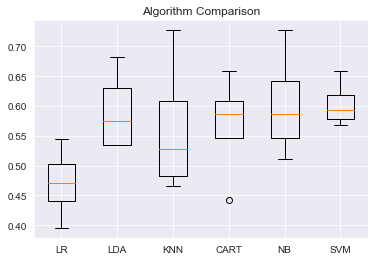

In [612]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [615]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      218 non-null    int64
 1   Q2      218 non-null    int64
 2   Q3      218 non-null    int32
 3   Q5      218 non-null    int64
 4   Q6      218 non-null    int64
 5   Q7      218 non-null    int64
 6   Q8      218 non-null    int64
 7   Q10_1   218 non-null    int64
 8   Q10_2   218 non-null    int64
 9   Q10_3   218 non-null    int64
 10  Q10_4   218 non-null    int64
 11  Q10_5   218 non-null    int64
 12  Q10_6   218 non-null    int64
 13  Q10_7   218 non-null    int64
 14  Q10_8   218 non-null    int64
 15  Q10_9   218 non-null    int64
 16  Q10_10  218 non-null    int64
 17  Q10_11  218 non-null    int64
 18  Q10_12  218 non-null    int64
 19  Q12     218 non-null    int64
 20  Q13     218 non-null    int64
 21  Q17_1   218 non-null    int64
 22  Q17_2   218 non-null    int64
 23  Q17_3   218 non

In [619]:
dataset_2 = dataset_1

In [620]:
dataset_2.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2', 'Q10_3',
       'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12', 'Q9'],
      dtype='object')

In [621]:
dataset_2.drop(columns =['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q12', 'Q13'], inplace = True)

In [622]:
dataset_2.sample(5)

,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9,Q10_10,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
210,3,4,4,3,3,3,3,5,4,3,...,3,4,4,3,4,5,5,5,5,4
99,4,1,4,5,5,4,4,3,5,2,...,1,2,2,3,2,4,4,4,3,5
44,4,3,3,4,5,3,3,5,2,2,...,3,1,2,2,2,2,4,2,2,4
113,3,3,3,3,4,2,3,3,3,4,...,1,3,2,3,1,3,3,3,2,3
171,3,2,2,3,1,3,3,3,3,3,...,3,3,4,4,3,2,5,5,2,3


In [623]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q10_1   218 non-null    int64
 1   Q10_2   218 non-null    int64
 2   Q10_3   218 non-null    int64
 3   Q10_4   218 non-null    int64
 4   Q10_5   218 non-null    int64
 5   Q10_6   218 non-null    int64
 6   Q10_7   218 non-null    int64
 7   Q10_8   218 non-null    int64
 8   Q10_9   218 non-null    int64
 9   Q10_10  218 non-null    int64
 10  Q10_11  218 non-null    int64
 11  Q10_12  218 non-null    int64
 12  Q17_1   218 non-null    int64
 13  Q17_2   218 non-null    int64
 14  Q17_3   218 non-null    int64
 15  Q17_4   218 non-null    int64
 16  Q17_5   218 non-null    int64
 17  Q17_6   218 non-null    int64
 18  Q17_7   218 non-null    int64
 19  Q17_8   218 non-null    int64
 20  Q17_9   218 non-null    int64
 21  Q17_10  218 non-null    int64
 22  Q17_11  218 non-null    int64
 23  Q17_12  218 non

In [624]:
array = dataset_2.values
X = array[:,0:24]
y = array[:,24]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [625]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [626]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.539641 (0.096896)
LDA: 0.585624 (0.062566)
KNN: 0.573864 (0.078132)
CART: 0.556950 (0.060966)
NB: 0.602801 (0.069354)
SVM: 0.632135 (0.016618)


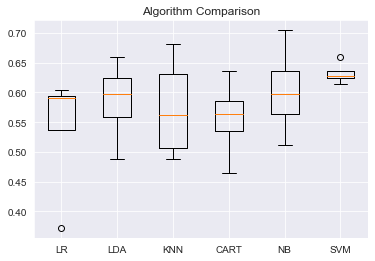

In [627]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()